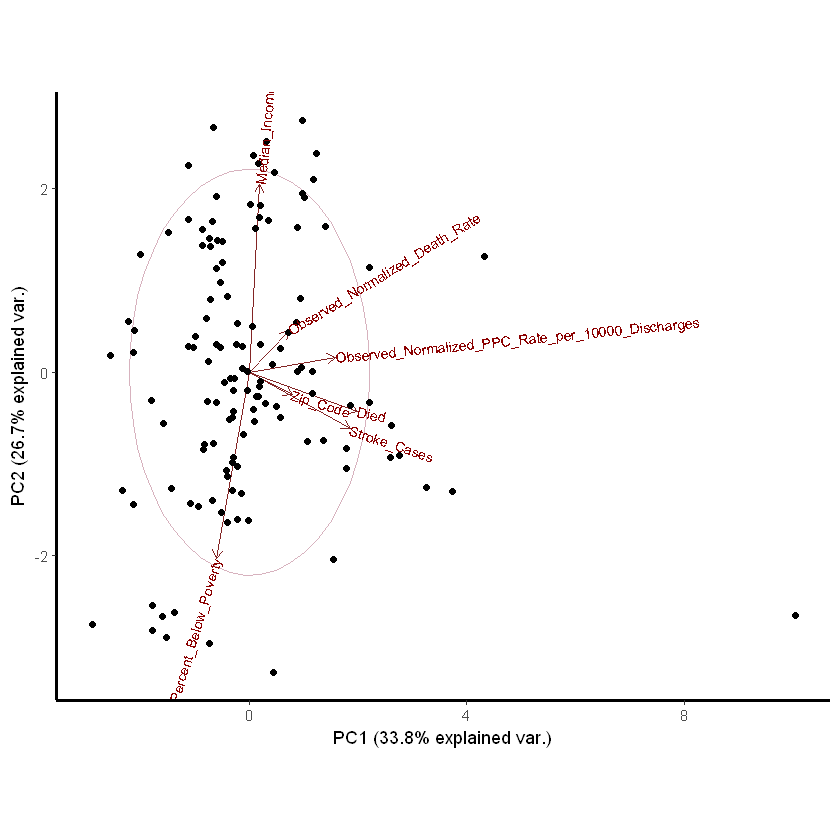

In [13]:
#Read in Data
data<-read.csv("County_PPC_Hospitals_NYC_Income_bp_mortality.csv", header=TRUE, row.name=1)
#Cut out needed data
data1<- data[,3:9]
#Perform PCA analyses
pca2<-prcomp(data1,
                center = TRUE,
                 scale. = TRUE)
library(ggbiplot)
library(plotly)
# Plot PCA on Circle of Correlations to view relationship between PPC rate and Income Measures
g <- ggbiplot(pca2, obs.scale = 1, var.scale = 1, 
             ellipse = TRUE,varname.size = 3, varname.adjust = 1, 
              circle = TRUE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
g <- g + coord_fixed(ratio = 1.69) 
g

Source : https://maps.googleapis.com/maps/api/staticmap?center=New+York&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New%20York
Warning message:
"Removed 70 rows containing missing values (geom_point)."

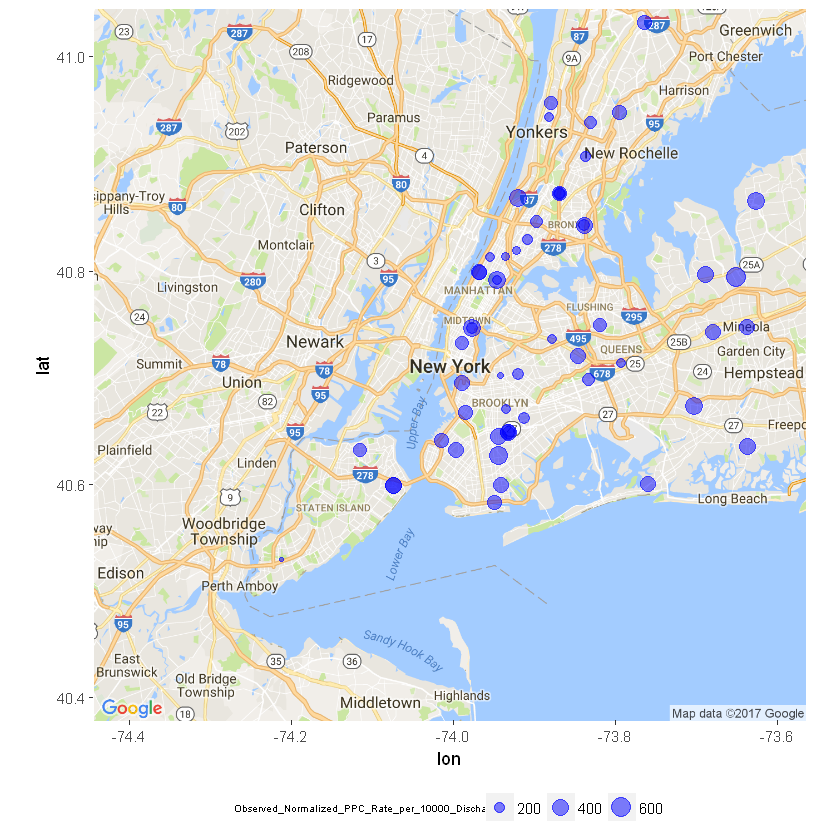

In [139]:
## Display how PPC rates are distributed throughout New York
library(zipcode)
data(zipcode)
datacor<- merge(data, zipcode, by.x="Zip_Code", by.y ="zip")
#Load map of New York
library(ggmap)
m <- get_map("New York",maptype='roadmap')
#Plot data on New York Map
mapped = ggmap(m) +
geom_point(aes(x = longitude, y = latitude, size=Observed_Normalized_PPC_Rate_per_10000_Discharges), col= "blue", data = datacor, alpha = .5)+
theme(legend.title = element_text(size=6), 
               legend.position = 'bottom',
               panel.background= element_rect(fill = 'white'))
            
mapped

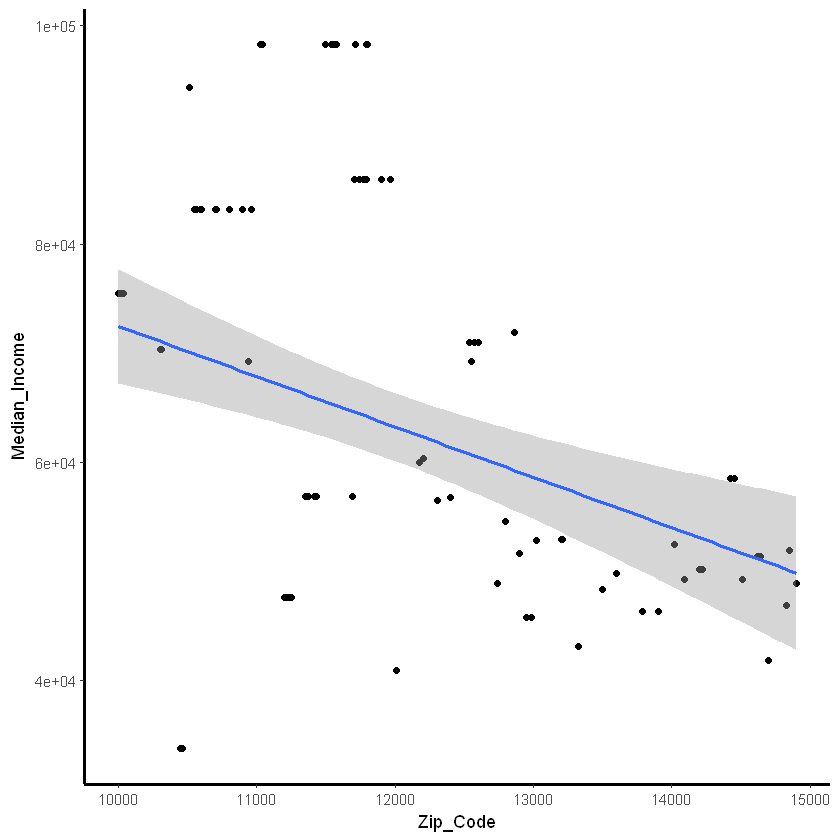

In [23]:
## Exploring the relatinoship between Zip-code and median income
library(ggplot2)
p<- ggplot(data, aes(Zip_Code, Median_Income)) + geom_point()
p<- p + geom_smooth(method = 'lm')
p<- p + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
p

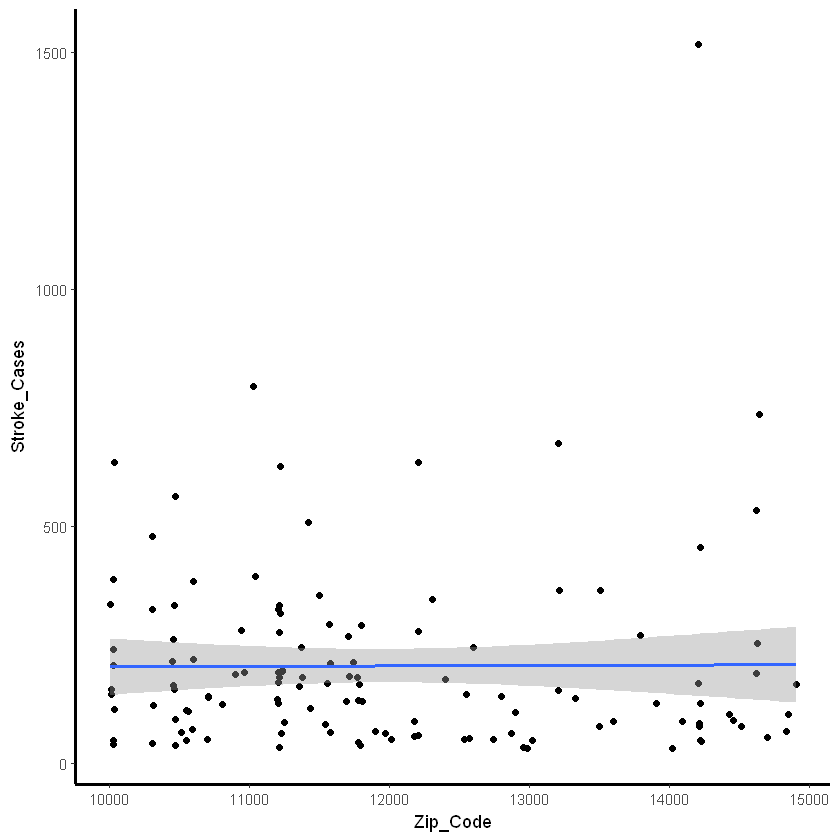

In [48]:
## Exploring the relatinoship between median income and stroke cases
l<- ggplot(data, aes(Zip_Code,Stroke_Cases)) + geom_point()
l<- l + geom_smooth(method = 'lm')
l<- l + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
l

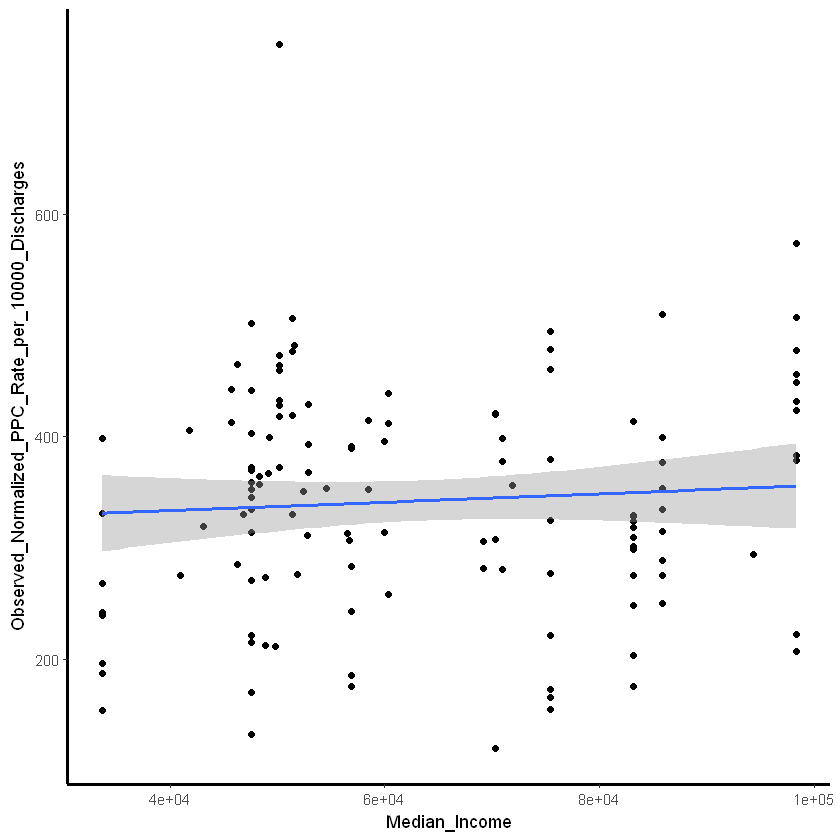

In [47]:
## Exploring the relatinoship between median income and PPC Rate
m<- ggplot(data, aes(Median_Income, Observed_Normalized_PPC_Rate_per_10000_Discharges)) + geom_point()
m<- m + geom_smooth(method = 'lm')
m<- m + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
m

In [44]:
head(data)

,County,City,Zip_Code,Percent_Below_Poverty,Median_Income,Observed_Normalized_PPC_Rate_per_10000_Discharges,Stroke_Cases,Died,Observed_Normalized_Death_Rate,X,X.1,X.2
Beth_Israel_Medical_Center/Petrie_Campus,New_York,New_York,10003,17.7,75459,277.16,336,41,12.20,NA,NA,NA
Bellevue_Hospital_Center,New_York,New_York,10016,17.7,75459,221.89,156,26,16.67,NA,NA,NA
NYU_Hospitals_Center,New_York,New_York,10016,17.7,75459,494.58,145,7,4.83,NA,NA,NA
St_Lukes_Roosevelt_Hospital_-_St_Lukes_Hospital_Division,New_York,New_York,10025,17.7,75459,379.36,241,39,16.18,NA,NA,NA
St_Lukes_Roosevelt_Hospital_Center_-_Roosevelt_Hospital_Division,New_York,New_York,10025,17.7,75459,324.64,207,26,12.56,NA,NA,NA
Memorial_Hospital_for_Cancer_and_Allied_Diseases,New_York,New_York,10027,17.7,75459,165.97,40,5,12.50,NA,NA,NA


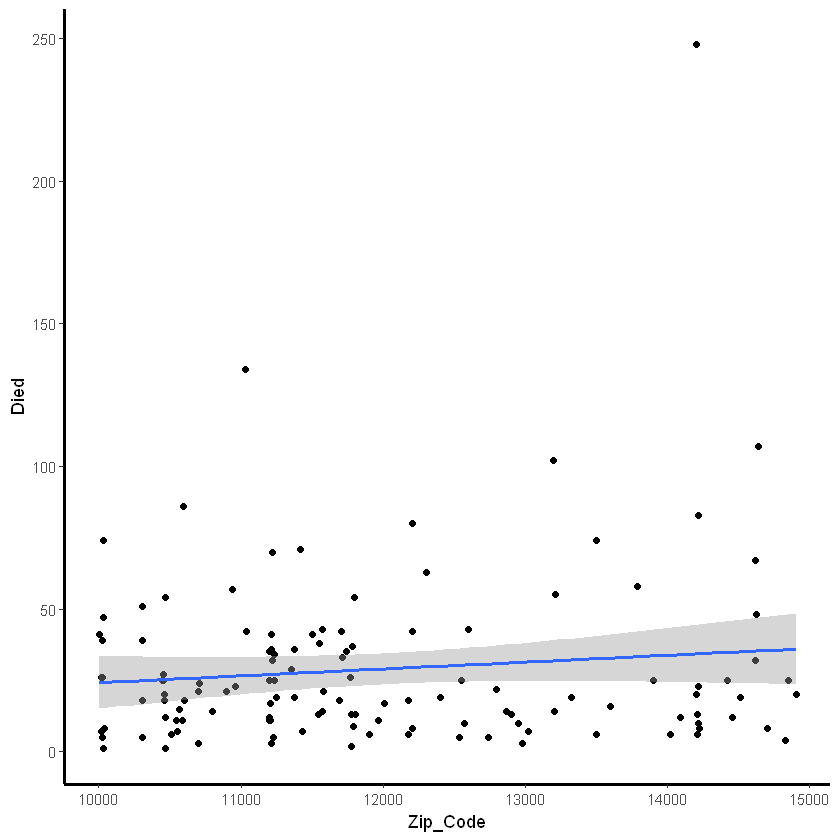

In [50]:
## Exploring the relatinoship between Death and Zip code
k<- ggplot(data, aes(Zip_Code, Died)) + geom_point()
k<- k + geom_smooth(method = 'lm')
k<- k + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
k

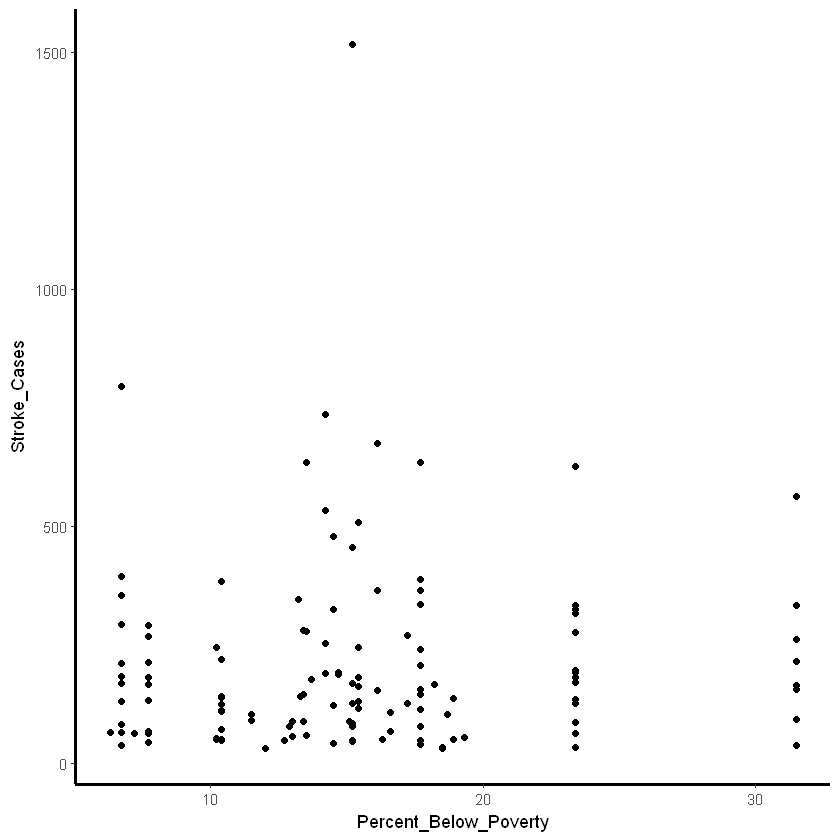

In [62]:
## Exploring the relatinoship between Poverty and Stroke cases 
k<- ggplot(data, aes(Percent_Below_Poverty,Stroke_Cases,)) + geom_point()
#k<- k + geom_smooth(method = 'lm')
k<- k + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
k

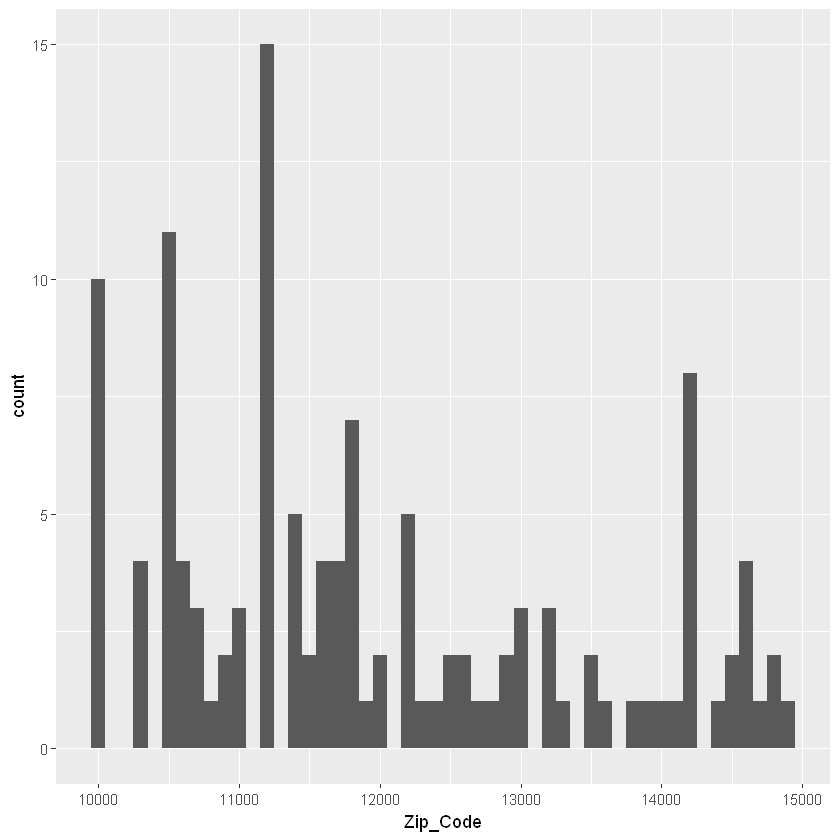

In [120]:
m <- ggplot(data, aes(x=Zip_Code))
m + geom_histogram(binwidth=100)
# hospital desity by Zip Code

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


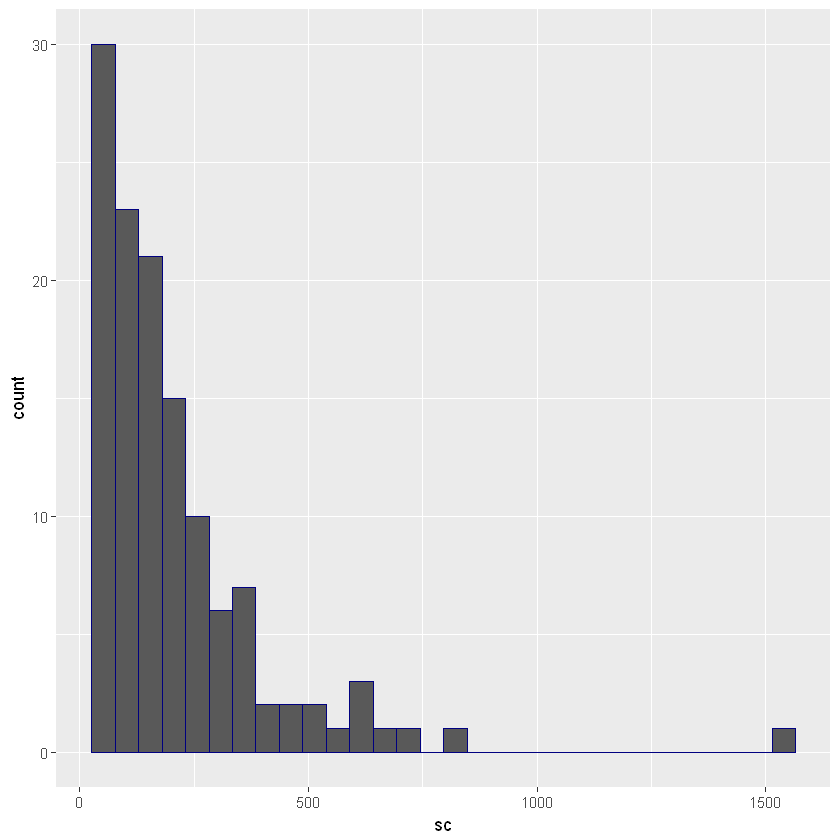

In [116]:
ggplot(data, aes(sc)) + geom_histogram(color= 'navy')
## only one hospital sees over 1500 stroke cases

In [107]:
zc<-data['Zip_Code']
zc = as.matrix(zc)
is.numeric(zc)

[1] TRUE

In [109]:
sc<-data['Stroke_Cases']
sc = as.matrix(sc)
is.numeric(sc)

[1] TRUE

Source : https://maps.googleapis.com/maps/api/staticmap?center=New+York&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New%20York
Warning message:
"Removed 70 rows containing missing values (geom_point)."

Warning message:
"Removed 70 rows containing missing values (geom_point)."

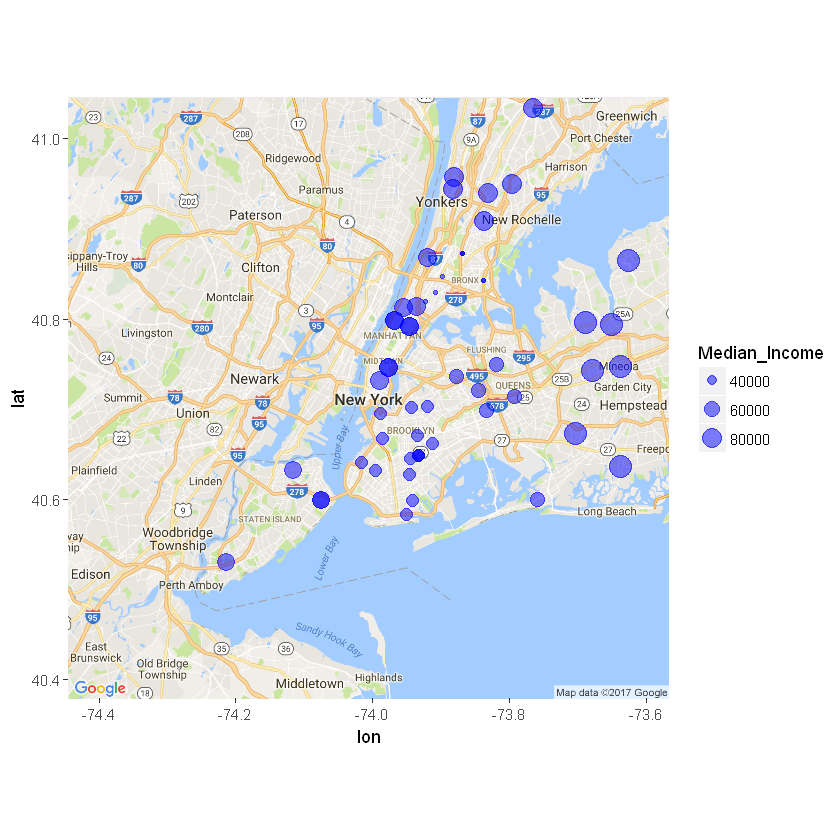

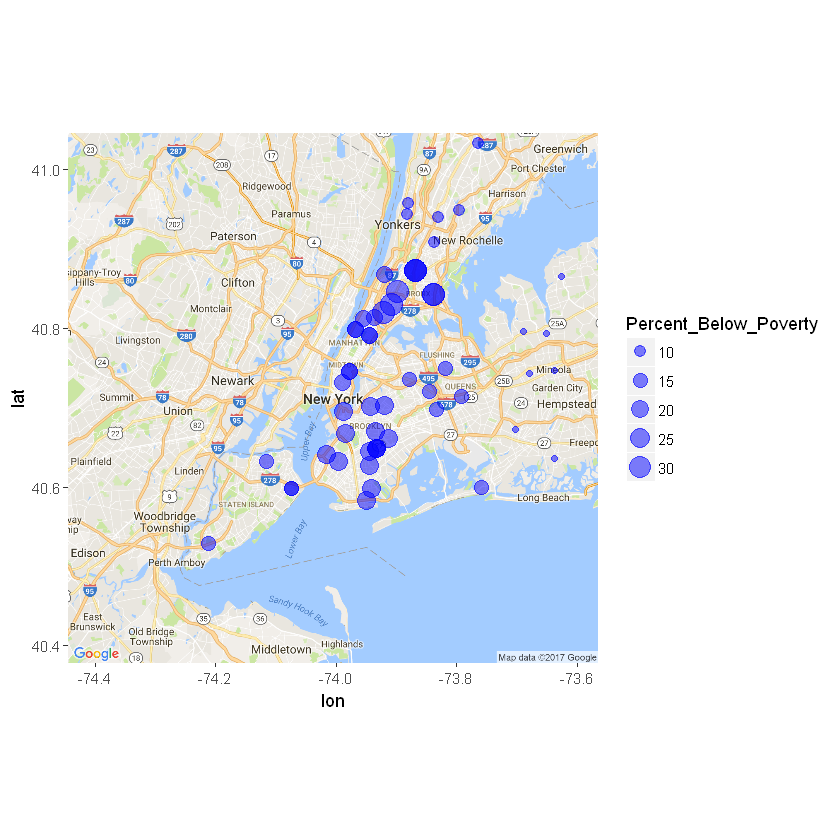

In [132]:
## How is wealth Distributed in New York?

library(zipcode)
data(zipcode)
datacor<- merge(data, zipcode, by.x="Zip_Code", by.y ="zip")
#Load map of New York
library(ggmap)
m <- get_map("New York",maptype='roadmap')
#Plot data on New York Map
mapped = ggmap(m) +
geom_point(aes(x = longitude, y = latitude, size=Median_Income), col= "blue", data = datacor, alpha = .5)
mapped

poverty = ggmap(m) +
geom_point(aes(x = longitude, y = latitude, size=Percent_Below_Poverty), col= "blue", data = datacor, alpha = .5)
poverty